<a href="https://colab.research.google.com/github/GuiMunizPB/Prova2IA/blob/main/ProvaGuilhermeMuniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color ="#2e8b57"> Guilherme Muniz - Prova 02 - INTRODUÇÃO A INTELIGÊNCIA ARTIFICIAL   </font>


Aplicação de diferentes etapas e métodos de IA, usando um conjunto de dados com 277 raças de cachorros, extraído do site do American Kennel Club.

# <font color ="#2e8b57"> Importação dos Dados   </font>

In [1]:
#importando as libraries do projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv")
df.head()

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly


# <font color ="#2e8b57"> Parte 1 (A) - Introdução e Pré Processamento de Dados  </font>

## <font color ="#2e8b57">Cabeçalho do Dataset   </font>

In [3]:
df.head(0)

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category


## <font color ="#2e8b57"> Informações Adicionais   </font>

In [4]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de linhas: 277
Número de colunas: 21


In [5]:
df.describe()

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
count,277.000000,277.000000,275.000000,275.000000,274.000000,274.000000,270.000000,257.000000,271.000000,253.000000,252.000000
mean,44.225801,52.720588,17.888858,27.291416,11.306569,13.832117,0.425926,0.529183,0.712915,0.624506,0.620635
std,14.238298,15.885454,12.290600,19.061416,1.817949,2.016668,0.198306,0.189068,0.168927,0.247271,0.201713
min,12.700000,17.780000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,33.020000,38.100000,8.164663,12.927383,10.000000,13.000000,0.200000,0.400000,0.600000,0.400000,0.400000
50%,45.085000,53.340000,15.875733,24.947580,12.000000,14.000000,0.400000,0.600000,0.600000,0.600000,0.600000
75%,55.880000,66.040000,22.679619,34.019428,12.000000,15.000000,0.600000,0.600000,0.800000,0.800000,0.800000
max,76.200000,88.900000,68.038855,108.862169,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Informações por coluna :
for i in df.describe():

  print(f"Informações coluna {i}: \n\tMédia: {df[i].mean()} Mediana: {df[i].median()} Moda: {df[i].mode()[0]} Desvio Padrão: {df[i].std()}\n")


Informações coluna min_height: 
	Média: 44.22580144404332 Mediana: 45.085 Moda: 25.4 Desvio Padrão: 14.238297871941816

Informações coluna max_height: 
	Média: 52.72058844765343 Mediana: 53.34 Moda: 68.58 Desvio Padrão: 15.885454412613708

Informações coluna min_weight: 
	Média: 17.8888583594 Mediana: 15.875732950000002 Moda: 15.875732950000002 Desvio Padrão: 12.290600194514079

Informações coluna max_weight: 
	Média: 27.291415832800002 Mediana: 24.947580350000003 Moda: 31.751465900000003 Desvio Padrão: 19.061416410296236

Informações coluna min_expectancy: 
	Média: 11.306569343065693 Mediana: 12.0 Moda: 12.0 Desvio Padrão: 1.8179489461015677

Informações coluna max_expectancy: 
	Média: 13.832116788321168 Mediana: 14.0 Moda: 15.0 Desvio Padrão: 2.016668064295317

Informações coluna grooming_frequency_value: 
	Média: 0.42592592592592593 Mediana: 0.4 Moda: 0.4 Desvio Padrão: 0.19830619670722646

Informações coluna shedding_value: 
	Média: 0.5291828793774319 Mediana: 0.6 Moda: 0.6 Desvio 



## <font color ="#2e8b57"> Pré-Processamento </font>

### <font color ="#2e8b57">Ajuste da Coluna Unnamed   </font>

In [7]:
df.rename(columns={"Unnamed: 0": "breed"}, inplace=True)

print(df.columns)

Index(['breed', 'description', 'temperament', 'popularity', 'min_height',
       'max_height', 'min_weight', 'max_weight', 'min_expectancy',
       'max_expectancy', 'group', 'grooming_frequency_value',
       'grooming_frequency_category', 'shedding_value', 'shedding_category',
       'energy_level_value', 'energy_level_category', 'trainability_value',
       'trainability_category', 'demeanor_value', 'demeanor_category'],
      dtype='object')


### <font color ="#2e8b57">Verificação de NaNs   </font>

In [8]:
print(f'Há valores NaN? {df.isna().values.any()}')

Há valores NaN? True


In [9]:
# Exibir o número de NaNs em cada coluna

nan_count = df.isna().sum()
print(nan_count)

breed                           0
description                     0
temperament                     1
popularity                     79
min_height                      0
max_height                      0
min_weight                      2
max_weight                      2
min_expectancy                  3
max_expectancy                  3
group                           0
grooming_frequency_value        7
grooming_frequency_category     7
shedding_value                 20
shedding_category              20
energy_level_value              6
energy_level_category           6
trainability_value             24
trainability_category          24
demeanor_value                 25
demeanor_category              25
dtype: int64


Tratarei os Nans mais a frente.

### <font color ="#2e8b57">Verificação de Duplicatas   </font>

In [10]:
df.duplicated().values.any()

False

### <font color ="#2e8b57">Tratamento de Nans   </font>

#### <font color ="#2e8b57"> Coluna "popularity"   </font>

In [11]:
df[df["popularity"].isna()]

,breed,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
5,American Bulldog,The American Bulldog is a descendant of the En...,"Loyal, Self-Confident",NaN,50.80,63.50,27.215542,45.359237,10.0,12.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
10,American Leopard Hound,The American Leopard Hound is a medium to larg...,"Sociable, Energetic, Intelligent",NaN,53.34,68.58,20.411657,31.751466,12.0,15.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
14,Appenzeller Sennenhund,The Appenzeller Sennenhund is also known as th...,"Agile, Versatile, Lively",NaN,48.26,55.88,21.772434,31.751466,12.0,15.0,...,0.4,Weekly Brushing,0.8,Regularly,1.0,Needs Lots of Activity,0.2,May be Stubborn,0.4,Reserved with Strangers
16,Australian Kelpie,"As a herding dog, the Australian Kelpie is int...","Loyal, Alert, Intelligent",NaN,43.18,50.80,NaN,NaN,10.0,13.0,...,0.4,Weekly Brushing,0.8,Regularly,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
18,Australian Stumpy Tail Cattle Dog,The Australian Stumpy Tail Cattle Dog is not a...,"Alert, Trainable, Comical",NaN,43.18,50.80,14.514956,20.411657,12.0,15.0,...,0.4,Weekly Brushing,0.4,Occasional,0.8,Energetic,0.8,Easy Training,0.6,Alert/Responsive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Transylvanian Hound,The Transylvanian Hound is an ancient Hungaria...,"Courageous, Good-Natured, Determined",NaN,55.88,66.04,24.947580,24.947580,10.0,14.0,...,0.4,Weekly Brushing,NaN,NaN,1.0,Needs Lots of Activity,0.2,May be Stubborn,NaN,NaN
261,Treeing Tennessee Brindle,The Treeing Tennessee Brindle originated in th...,"Friendly, Alert, Intelligent",NaN,40.64,60.96,13.607771,22.679619,10.0,12.0,...,0.4,Weekly Brushing,0.4,Occasional,0.6,Regular Exercise,NaN,NaN,NaN,NaN
268,Wetterhoun,"The Wetterhoun, although originally bred for ...","Loyal, Good-Natured, Intelligent",NaN,12.70,58.42,22.679619,34.019428,13.0,13.0,...,0.2,Occasional Bath/Brush,0.4,Occasional,0.6,Regular Exercise,0.2,May be Stubborn,0.4,Reserved with Strangers
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive


Como os valores NaN na coluna de "popularity" representam aproximadamente 29% do total de entradas no conjunto de dados, sua presença pode ter um impacto significativo na análise e nos resultados obtidos. Remover esses valores ausentes pode ser uma abordagem mais prudente e justificável.

In [12]:
df.drop(columns=["popularity"], inplace=True)

#### <font color ="#2e8b57"> Coluna "temperament"   </font>

In [13]:
df[df["temperament"].isna()]

,breed,description,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
236,Slovakian Wirehaired Pointer,Slovakian Wirehaired Pointer is a dog of moder...,NaN,57.15,67.31,22.679619,29.483504,12.0,15.0,Foundation Stock Service,0.2,Occasional Bath/Brush,0.4,Occasional,0.8,Energetic,0.4,Independent,1.0,Outgoing


Dado que a coluna "temperament" tem apenas uma linha contendo um Nan, pensei numa abordagem de preenchimento dessa coluna. Percebi que a "description" continham adjetivos que se assemelhavam às possíveis classificações da coluna "temperament". Separei todas as palavras da description dessa linha e busquei um match com as possíveis palavras da coluna "temperament" para um preenchimento mais inteligente.

In [14]:
def check_match(word, temperament_words):
    for t in temperament_words:
        if word.lower() == t.lower() or word.lower().startswith(t.lower()[:3]):
            return t
    return None

# Dividindo os valores da coluna "temperament" em palavras individuais
temperament_words = set()
for temperament in df['temperament'].dropna():
    words = temperament.split(', ')
    temperament_words.update(words)

# Filtrando as linhas onde a coluna "temperament" é NaN
nan_temperament_row = df[df['temperament'].isna()]

# Verificando se alguma palavra da descrição corresponde a algum valor de "temperament"
for index, row in nan_temperament_row.iterrows():
    description_words = row['description'].split()  # Separando as palavras da descrição
    for word in description_words:
        matched_temperament = check_match(word, temperament_words)
        if matched_temperament:
            print(f"A palavra '{word}' da descrição corresponde ao valor '{matched_temperament}' de 'temperament'.")


A palavra 'Pointer' da descrição corresponde ao valor 'Poised' de 'temperament'.
A palavra 'strength,' da descrição corresponde ao valor 'Strong' de 'temperament'.
A palavra 'working' da descrição corresponde ao valor 'Work-Oriented' de 'temperament'.
A palavra 'nobleness' da descrição corresponde ao valor 'Noble' de 'temperament'.
A palavra 'called' da descrição corresponde ao valor 'Calm' de 'temperament'.
A palavra 'harsh' da descrição corresponde ao valor 'Hardworking' de 'temperament'.
A palavra 'work' da descrição corresponde ao valor 'Work-Oriented' de 'temperament'.
A palavra 'plain,' da descrição corresponde ao valor 'Playful but also Work-Oriented. Very Active and Upbeat.' de 'temperament'.
A palavra 'water' da descrição corresponde ao valor 'Watchful' de 'temperament'.
A palavra 'work' da descrição corresponde ao valor 'Work-Oriented' de 'temperament'.
A palavra 'obedient' da descrição corresponde ao valor 'Obedient' de 'temperament'.
A palavra 'easy' da descrição correspond

In [15]:
df['temperament'] = df['temperament'].fillna('Strong-Willed, Hardworking, Obedient')

#### <font color ="#2e8b57"> Coluna "min_weight" e "max_weight"   </font>

In [16]:
df[df["min_weight"].isna()]


,breed,description,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
16,Australian Kelpie,"As a herding dog, the Australian Kelpie is int...","Loyal, Alert, Intelligent",43.18,50.80,NaN,NaN,10.0,13.0,Foundation Stock Service,0.4,Weekly Brushing,0.8,Regularly,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
244,Spinone Italiano,The Spinone Italiano (plural: Spinoni Italiani...,"Sociable, Patient, Docile",55.88,68.58,NaN,NaN,10.0,12.0,Sporting Group,0.4,Weekly Brushing,NaN,NaN,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive


As duas linhas que contém Nans para min_weight, contém tanto para a coluna "min_weight" e "max_weight"

Optei por investigar a correlação entre weights e o heights dos cães, dado que comumente há uma relação substancial entre essas duas variáveis.

In [17]:
# Calculando a correlação entre as colunas 'min_weight' e 'max_weight' com 'max_height' e 'min_height'
correlation_matrix = df[['min_weight', 'max_weight', 'max_height', 'min_height']].corr()
print(correlation_matrix)


            min_weight  max_weight  max_height  min_height
min_weight    1.000000    0.947519    0.793010    0.815263
max_weight    0.947519    1.000000    0.806405    0.792409
max_height    0.793010    0.806405    1.000000    0.935146
min_height    0.815263    0.792409    0.935146    1.000000


Percebendo a forte correlação, optei por uma abordagem de imputação dos valores ausentes da seguinte maneira: Primeiramente, identifiquei as alturas mínimas (min_heights) para ambas as linhas que continham valores NaN e armazenei as respectivas linhas do conjunto de dados cujas variações estavam dentro de uma faixa de 2,5 para mais ou para menos em relação ao valor ausente. Em seguida, procedi de maneira análoga para as alturas máximas (max_heights). Por fim, levando em conta a alta correlação observada, decidi preencher os valores NaN com as médias das alturas mínimas (min_height) e máximas (max_height) das linhas previamente armazenadas.

In [18]:
# Encontrando as linhas onde 'min_weight' e 'max_weight' são NaN
nan_weight_rows = df[df['min_weight'].isna() & df['max_weight'].isna()]

# Criando uma máscara para encontrar linhas com 'min_height' e 'max_height' similares da primeira linha das nan_weight_rows
min_height_mask1 = (df['min_height'] >= (nan_weight_rows['min_height'].iloc[0] - 2.5)) & (df['min_height'] <= (nan_weight_rows['min_height'].iloc[0] + 2.5))
max_height_mask1 = (df['max_height'] >= (nan_weight_rows['max_height'].iloc[0] - 2.5)) & (df['max_height'] <= (nan_weight_rows['max_height'].iloc[0] + 2.5))

#Aplicando a máscara para encontrar linhas com valores similares de 'min_height' e 'max_height'
similar_rows1 = df[min_height_mask1 & max_height_mask1]

# Criando uma máscara para encontrar linhas com 'min_height' e 'max_height' similares da segunda linha das nan_weight_rows
min_height_mask2 = (df['min_height'] >= (nan_weight_rows['min_height'].iloc[1] - 2.5)) & (df['min_height'] <= (nan_weight_rows['min_height'].iloc[1] + 2.5))
max_height_mask2 = (df['max_height'] >= (nan_weight_rows['max_height'].iloc[1] - 2.5)) & (df['max_height'] <= (nan_weight_rows['max_height'].iloc[1] + 2.5))

similar_rows2 = df[min_height_mask2 & max_height_mask2]

# Calculando a média dos valores de 'min_weight' e 'max_weight' para as linhas similares à primeira linha das nan_weight_rows
mean_min_weight1 = similar_rows1['min_weight'].mean()
mean_max_weight1 = similar_rows1['max_weight'].mean()

# Calculando a média dos valores de 'min_weight' e 'max_weight' para as linhas similares à segunda linha das nan_weight_rows
mean_min_weight2 = similar_rows2['min_weight'].mean()
mean_max_weight2 = similar_rows2['max_weight'].mean()

# Preenchendo os valores NaN de 'min_weight' e 'max_weight' com a média calculada
df['min_weight'] = df['min_weight'].fillna({nan_weight_rows.index[0]: mean_min_weight1, nan_weight_rows.index[1]: mean_min_weight2})
df['max_weight'] = df['max_weight'].fillna({nan_weight_rows.index[0]: mean_max_weight1, nan_weight_rows.index[1]: mean_max_weight2})


#### <font color ="#2e8b57"> Coluna "min_expectancy" e "max_expectancy"   </font>

In [19]:
df[df["min_expectancy"].isna()]

,breed,description,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
55,Braque Francais Pyrenean,The Braque Francais Pyrenean is a well-proport...,"Friendly, Smart, Willing to Please",46.990,58.42,18.143695,24.947580,NaN,NaN,Foundation Stock Service,0.2,Occasional Bath/Brush,0.6,Seasonal,1.0,Needs Lots of Activity,NaN,NaN,NaN,NaN
67,Carolina Dog,Carolina dogs are descended from the canines t...,"Loyal, Independent, Reserved with Strangers",45.085,49.53,13.607771,24.947580,NaN,NaN,Foundation Stock Service,0.2,Occasional Bath/Brush,0.6,Seasonal,0.6,Regular Exercise,1.0,Eager to Please,0.6,Alert/Responsive
71,Central Asian Shepherd Dog,Central Asian Shepherd Dogs are a natural prot...,"Independent, Courageous, Self-Confident",64.770,69.85,39.916129,49.895161,NaN,NaN,Foundation Stock Service,0.2,Occasional Bath/Brush,0.6,Seasonal,0.4,Calm,0.4,Independent,0.2,Aloof/Wary


Busca por correlações

In [20]:
# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Para a coluna min_expectancy
correlations_min = numeric_columns.drop(columns="min_expectancy").corrwith(df["min_expectancy"]).abs().sort_values(ascending=False)

print("Correlações para 'min_expectancy':")
print(correlations_min)

# Para a coluna max_expectancy
correlations_max = numeric_columns.drop(columns="max_expectancy").corrwith(df["max_expectancy"]).abs().sort_values(ascending=False)

print("\nCorrelações para 'max_expectancy':")
print(correlations_max)


Correlações para 'min_expectancy':
max_expectancy              0.765434
min_weight                  0.541761
max_weight                  0.513726
min_height                  0.460569
max_height                  0.441227
shedding_value              0.251795
demeanor_value              0.181565
trainability_value          0.091815
grooming_frequency_value    0.028934
energy_level_value          0.000183
dtype: float64

Correlações para 'max_expectancy':
min_expectancy              0.765434
min_weight                  0.552663
max_weight                  0.523730
max_height                  0.467058
min_height                  0.463709
shedding_value              0.356471
demeanor_value              0.168534
grooming_frequency_value    0.127438
trainability_value          0.094136
energy_level_value          0.012556
dtype: float64


A correlação forte é apenas com a coluna "max_expectancy" e ambas estão faltantes nas linhas que continham os nans para "min_expectancy".

Optei por preencher os valores nans com a media dos valores de min_expectancy e max_expectancy do conjunto de dados.

In [21]:
df['min_expectancy'] = df['min_expectancy'].fillna(df['min_expectancy'].median())
df['max_expectancy'] = df['max_expectancy'].fillna(df['max_expectancy'].median())

#### <font color ="#2e8b57"> Colunas de ["grooming", shedding", "trainability", "energy" e "demeanor"]

Cogitei utilizar um knn para preencher os valores Nans das seguintes colunas mas percebi que o resultado estava ficando muito próximo ao valor que mais se repetia nas colunas. Como os valores são discretos decidi preencher os valores Nans com o resultado da moda das colunas.

In [22]:
def fill_with_mode(df, columns):
    for column in columns:
        mode = df[column].mode()[0]
        df[column] = df[column].fillna(mode)
    return df

columns_to_fill = ['grooming_frequency_value', 'grooming_frequency_category',
                       'shedding_value', 'shedding_category',
                       'energy_level_value', 'energy_level_category',
                       'trainability_value', 'trainability_category',
                       'demeanor_value', 'demeanor_category']

df = fill_with_mode(df, columns_to_fill )


In [23]:
# Defina as colunas de interesse
#columns_to_check = [
   # ("grooming_frequency_value" , "grooming_frequency_category"),
   # ("energy_level_value", "energy_level_category"),
   # ("shedding_value", "shedding_category"),
   # ("trainability_value", "trainability_category"),
   # ("demeanor_value", "demeanor_category")
#]

# Crie uma lista com o nome das colunas
#columns = [col for cols in columns_to_check for col in cols]

# Remova as linhas com valores NaN nas colunas especificadas
#df = df.dropna(subset=columns)

# Redefina o índice do DataFrame
#df.reset_index(drop=True, inplace=True)

In [24]:
df

,breed,description,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


#### <font color ="#2e8b57"> Verificação de valores com 0  </font>

In [25]:
# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Verificando se há algum valor zero em cada linha
rows_with_zeros = df[(numeric_columns == 0).any(axis=1)]

# Exibindo as linhas que contêm valores zero
print("Linhas com valores zero:")
rows_with_zeros


Linhas com valores zero:


,breed,description,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
65,Cane Corso,At nearly 28 inches at the shoulder and often ...,"Affectionate, Intelligent, Majestic",59.69,69.85,0.000000,0.000000,9.0,12.0,Working Group,0.2,Occasional Bath/Brush,0.4,Occasional,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
209,Pyrenean Shepherd,"These tough, lean, and lively herders, famous ...","Affectionate, Active, Enthusiastic",38.10,53.34,6.803886,13.607771,0.0,0.0,Herding Group,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.4,Reserved with Strangers


Corrigindo a primeira linha com 0, com uma lógica similar ao tratamento dos Nans da coluna (min_weight) e (max_weight).

In [26]:
# Selecionando a primeira linha com valores zero
row_to_replace0 = rows_with_zeros.iloc[0]

# Criando uma máscara para encontrar linhas com 'min_height' e 'max_height' similares da primeira linha com valores zero
min_height_mask = (df['min_height'] >= (row_to_replace0['min_height'] - 2.5)) & (df['min_height'] <= (row_to_replace0['min_height'] + 2.5))
max_height_mask = (df['max_height'] >= (row_to_replace0['max_height'] - 2.5)) & (df['max_height'] <= (row_to_replace0['max_height'] + 2.5))

# Aplicando a máscara para encontrar linhas com valores similares de 'min_height' e 'max_height'
similar_rows = df[min_height_mask & max_height_mask]

# Calculando a média dos valores de 'min_weight' e 'max_weight' para as linhas similares à primeira linha com valores zero
mean_min_weight = similar_rows['min_weight'].mean()
mean_max_weight = similar_rows['max_weight'].mean()

# Substituindo os valores zero (0.0000) por NaN para poder preencher com a média posteriormente
df.loc[row_to_replace0.name, 'min_weight'] = float('NaN')
df.loc[row_to_replace0.name, 'max_weight'] = float('NaN')

# Preenchendo os valores NaN de 'min_weight' e 'max_weight' com a média calculada
df.loc[row_to_replace0.name, 'min_weight'] = mean_min_weight
df.loc[row_to_replace0.name, 'max_weight'] = mean_max_weight


Para a segunda linha com zero, a mesma lógica para o tratamento de Nans da coluna (min_expectancy).

In [27]:
row_to_replace1 = rows_with_zeros.iloc[1]

# Substituindo os valores zero (0.0000) por NaN para poder preencher com a média posteriormente
df.loc[row_to_replace1.name, 'min_expectancy'] = float('NaN')
df.loc[row_to_replace1.name, 'max_expectancy'] = float('NaN')


df['min_expectancy'] = df['min_expectancy'].fillna(df['min_expectancy'].median())
df['max_expectancy'] = df['max_expectancy'].fillna(df['max_expectancy'].median())

#### <font color ="#2e8b57"> Tratamento Concluído  </font>

In [28]:
nan_count = df.isna().sum()
print(nan_count)

breed                          0
description                    0
temperament                    0
min_height                     0
max_height                     0
min_weight                     0
max_weight                     0
min_expectancy                 0
max_expectancy                 0
group                          0
grooming_frequency_value       0
grooming_frequency_category    0
shedding_value                 0
shedding_category              0
energy_level_value             0
energy_level_category          0
trainability_value             0
trainability_category          0
demeanor_value                 0
demeanor_category              0
dtype: int64


### <font color ="#2e8b57"> Redução de Dimensionalidade (PCA)  </font>

In [29]:
df.dtypes

breed                           object
description                     object
temperament                     object
min_height                     float64
max_height                     float64
min_weight                     float64
max_weight                     float64
min_expectancy                 float64
max_expectancy                 float64
group                           object
grooming_frequency_value       float64
grooming_frequency_category     object
shedding_value                 float64
shedding_category               object
energy_level_value             float64
energy_level_category           object
trainability_value             float64
trainability_category           object
demeanor_value                 float64
demeanor_category               object
dtype: object

Reduzindo a dimensionalidade das colunas que tem alta correlação, utilizando o método Pca consegui um bom nível de variância explicada.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Normalização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["min_weight", "max_weight", "min_height", "max_height"]])

# Aplicar o PCA aos dados normalizados
num_components = 1
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)

# Criar um DataFrame para os componentes principais
components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

In [31]:
# Variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Imprimir a variância explicada por cada componente
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Variância explicada por PC{i+1}: {ratio:.2%}')


Variância explicada por PC1: 89.20%


In [32]:
df['PC1'] = components_df['PC1']

### <font color ="#2e8b57"> Redução de Dimensionalidade Manual  </font>



#### <font color ="#2e8b57"> Colunas "_category"  </font>


Decidi dropar as colunas _category de ["grooming", shedding", "trainability", "energy" e "demeanor"]. Os values possíveis para as respectivas colunas da seção são discretos e limitados a [0.2, 0.4, 0.6, 0.8, 1.0].

In [33]:
def drop_columns_by_description(df, descriptions):
    columns_to_drop = [col for col in df.columns if any(desc in col for desc in descriptions)]
    return df.drop(columns=columns_to_drop)

# Lista de descrições a serem procuradas nas colunas
descriptions_to_drop = ["grooming_frequency_category",
                       "shedding_category",
                       "energy_level_category",
                       "trainability_category",
                       "demeanor_category"]

# Chama a função para remover as colunas
df = drop_columns_by_description(df, descriptions_to_drop)

#### <font color ="#2e8b57"> Colunas "min_weight", "max_weight", "min_height", "max_heigt"  </font>


Agora vou reduzir a dimensionalidade das colunas (min_weight) (max_weight), (min_height) (max_heigt) para também ter uma alternativa de explicar aquilo que as colunas redimensionadas pelo PCA não pode englobar. Existe um indíce chamado de (Dog BMI), é uma formula similar ao IMC (Índice de Massa corporal), com essa label eu conseguiria resumir as 4 colunas em 1, usando os valores médios pra massa e pra altura e aplicando a fórmula: mass (kg) / height^2 (meters).

In [34]:
# Função para calcular o BMI
def calculate_bmi(row):
    min_weight = row['min_weight']
    max_weight = row['max_weight']
    min_height_cm = row['min_height']
    max_height_cm = row['max_height']

    # Convertendo a altura de cm para metros
    min_height_m = min_height_cm / 100
    max_height_m = max_height_cm / 100

    # Calcula a média do peso e altura
    avg_weight = (min_weight + max_weight) / 2
    avg_height = (min_height_m + max_height_m) / 2

    # Calcula o BMI
    bmi = avg_weight / (avg_height ** 2)

    return bmi

# Adiciona a coluna de BMI ao DataFrame
df['dog_BMI'] = df.apply(calculate_bmi, axis=1)


#### <font color ="#2e8b57"> Coluna "breed" e "description" </font>


Retirar as coluna description que não será usada nos conjuntos de treino e teste.

In [35]:
df.drop(columns=["description"], inplace=True)
df.drop(columns=["breed"], inplace=True)

### <font color ="#2e8b57"> Encodings  </font>


#### <font color ="#2e8b57"> Coluna "group" (target)  </font>


In [36]:
#Visualizando os valores possíveis de group
group_values = df["group"].unique().tolist()

print(group_values)


['Toy Group', 'Hound Group', 'Terrier Group', 'Working Group', 'Foundation Stock Service', 'Non-Sporting Group', 'Sporting Group', 'Herding Group', 'Miscellaneous Class']


Essas classificações de group não ficaram conclusivas e estavam prejudicando a acurácia do meu modelo. Acredito que pela coluna (Miscellaneous) representar uma classe de raças "diversas" e poucas linhas, é muito díficil prever os valores para tal. Já a coluna (Non-Sporting Group) a própria descrição no American Kennel Club explica a dificuldade: Eles vêm de uma ampla variedade de origens, por isso é difícil generalizar sobre esse grupo de cães.

In [37]:
df = df[df['group'] != 'Miscellaneous Class']
df = df[df['group'] != 'Non-Sporting Group']

df.reset_index(drop=True, inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

# Criar um LabelEncoder
label_encoder = LabelEncoder()

# Aplicar o label encoding à coluna 'group'
df['group_encoded'] = label_encoder.fit_transform(df['group'])

# Criar um dicionário para mapear os valores originais para os valores codificados
group_original_to_encoded = {label: encoded for label, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Imprimir o dicionário
print("Dicionário de mapeamento de valores originais para valores codificados:")
print(group_original_to_encoded)


Dicionário de mapeamento de valores originais para valores codificados:
{'Foundation Stock Service': 0, 'Herding Group': 1, 'Hound Group': 2, 'Sporting Group': 3, 'Terrier Group': 4, 'Toy Group': 5, 'Working Group': 6}


In [39]:
df.drop(columns=["group"], inplace=True)

#### <font color ="#2e8b57"> Coluna "temperament" </font>


Dividir os inúmeros temperament em 4 grupos para depois fazer um label encoding efetivo

In [40]:
# Dividir os valores da coluna "temperament" em uma lista de palavras
temperament_words = df['temperament'].str.split(', ')

# Criar um conjunto vazio para armazenar valores únicos
unique_words = set()

# Iterar sobre cada linha da lista de palavras e adicionar ao conjunto
for words_list in temperament_words:
    unique_words.update(words_list)

# Exibir os valores únicos
print(unique_words)

{'Eager', 'Home-Loving', 'Affectionate', 'Amiable', 'Sensitive', 'Optimistic', 'Noble', 'Docile', 'Independent-Minded', 'Adaptable', 'Lively', 'Perceptive', 'Aristocratic', 'Low-Key', 'Agile', 'Quick', 'Deeply Affectionate', 'Kind', 'Outgoing', 'Dignified', 'Fearless', 'Spirited', 'Energetic', 'Spunky', 'Funny', 'Calm', 'Enthusiastic', 'Good-Tempered', 'Good-Humored', 'Comical', 'Determined', 'Gentle', 'Clever', 'Exuberant', 'Tomboyish', 'Courteous', 'Serious-Minded', 'Polite', 'Playful but also Work-Oriented. Very Active and Upbeat.', 'Active', 'Trainable', 'Family-Oriented', 'Cheerful', 'People-Oriented', 'Vigilant', 'Easy-Going', 'Merry', 'Obedient', 'Eager to Please', 'Entertaining', 'Inquisitive', 'Sense Of Humor', 'Gentlemanly', 'Even-Tempered', 'Sweet', 'Versatile', 'Dashing', 'Regal', 'Upbeat', 'Loving', 'Devoted', 'Tenderhearted', 'Mischievous', 'Self-Confident', 'Independent', 'Lovable', 'Mellow', 'Deeply Devoted', 'Happy', 'Pleasant', 'Humble', 'Strong', 'Confident', 'Alert 

amiable:
Essa classe se refere a temperamentos que envolvem interação e relacionamento com outras pessoas e animais.

lively:
Essa classe se refere a temperamentos que envolvem energia, atividade física e movimento.

emotional:
Essa classe se refere a temperamentos que envolvem emoções, sentimentos e disposição.

quick-witted:
Essa classe se refere a temperamentos que envolvem habilidades mentais, inteligência e capacidade de aprendizagem.

In [41]:
temperament_classes = {
    'amiable': ['Outgoing', 'Friendly', 'Home-Loving', 'Easy-Going','People-Oriented','Charming', 'Sociable', 'Gregarious', 'Versatile', 'Family-Oriented', 'Entertaining', 'Exuberant','Confident Guardian', 'Polite', 'Cheerful', 'Kind', 'Loving',  'Sweet-Natured','Sweet', 'Charismatic','Docile', 'Amiable'],
    'lively': ['Trainable', 'Merry', 'Peppy', 'Bold', 'Active', 'Lovable', 'Upbeat', 'Comical', 'Keen', 'Perky', 'Adventurous', 'Agile', 'Poised', 'Energetic', 'Dashing', 'Vivacious', 'Ready to Work', 'Spunky', 'Athletic', 'Determined', 'Strong', 'Fearless', 'Boisterous', 'Proud', 'Frollicking', 'Undemanding', 'Sprightly', 'Inquisitive', 'Vigilant', 'Plucky','Brave'],
    'emotional': ['Sensitive', 'Reserved', 'Faithful', 'Graceful', 'Happy-Go-Lucky', 'Fun-Loving', 'Gentle', 'Devoted', 'Good-Natured', 'Patient','Aristocratic', 'Busy', 'Sassy', 'Upbeat', 'Comical', 'Happy', 'Keenly Observant', 'Responsive', 'Optimistic', 'Positive', 'Low-Key', 'Good-Humored', 'Tenderhearted', 'Watchful', 'Affectionate', 'Deeply Affectionate', 'Keenly Alert', 'Deeply Devoted', 'Spirited', 'Courteous', 'Dignified', 'Bright', 'Mischievous', 'Noble', 'Courageous', 'Eager to Please', 'Quick', 'Sense of Humor', 'Willing to Please', 'Regally Dignified', 'Observant', 'Powerful', 'Sweet-Tempered', 'Lively', 'Happy', 'Strong-Willed', 'Playful', 'Obedient', 'Canny', 'Alert and Intelligent', 'Mellow', 'Affectionate', 'Confident', 'Adaptable', 'Tenacious', 'Self-Confident', 'Sweet', 'Brave', 'Charismatic'],
    'quick-witted': ['Work-Oriented', 'Intelligent', 'Majestic', 'Regal in Manner', 'Serious-Minded', 'Playful but also Work-Oriented. Very Active and Upbeat.', 'Humble', 'Clever', 'Amusing', 'Quick', 'Wickedly Smart', 'Regal', 'Calm', 'Attentive', 'Even-Tempered', 'Alert', 'Loyal', 'Courageous', 'Smart', 'Good-Tempered', 'Pleasant', 'Bouncy', 'Undemanding', 'Sweet-Natured', 'Dependable', 'Confident', 'Alert', 'Polite', 'Independent-Minded', 'Curious', 'Amusing', 'Perceptive', 'Profoundly Loyal', 'Reserved with Strangers', 'Independent-Minded', 'Curious', 'Amusing', 'Clever', 'Good-Humored', 'Eager', 'Hardworking', 'Keenly Alert', 'Deeply Devoted', 'Observant', 'Powerful', 'Optimistic', 'Positive', 'Versatile', 'Funny', 'Athletic', 'Determined', 'Fearless', 'Boisterous', 'Proud', 'Family-Oriented', 'Regal', 'Alert', 'Loyal', 'Polite', 'Confident Guardian', 'Smart', 'Good-Tempered', 'Frollicking', 'Responsive', 'Undemanding', 'Sweet-Natured', 'Sprightly', 'Inquisitive', 'Vigilant', 'Gentlemanly']
}

In [42]:
# Função para encontrar a classe correspondente a uma palavra
def find_temperament_class(word):
    for temperament_class, words_list in temperament_classes.items():
        if word in words_list:
            return temperament_class
    return None

# Modificar a coluna "temperament" com a nova divisão
for index, row in df.iterrows():
    new_temperaments = set()  # Usando um conjunto para evitar repetições
    for word in row['temperament'].split(', '):
        temperament_class = find_temperament_class(word)
        if temperament_class:
            new_temperaments.add(temperament_class)
    df.at[index, 'temperament'] = ', '.join(new_temperaments)

Agora o one hot encoding com a disposição dos dados nova

In [43]:
# Criar um dicionário para mapear os valores originais para os números atribuídos
temperament_label_map = {'amiable': 0, 'lively': 1, 'emotional': 2, 'quick-witted': 3}

# Função para aplicar one-hot encoding a uma lista de temperamentos
def one_hot_encode(temperament_list):
    encoded_temperaments = [0] * len(temperament_label_map)  # Inicializar com zeros
    for temperament in temperament_list.split(', '):
        encoded_temperaments[temperament_label_map[temperament]] = 1
    return encoded_temperaments

# Aplicar one-hot encoding à coluna 'temperament'
df_encoded = pd.DataFrame(df['temperament'].apply(one_hot_encode).tolist(), columns=temperament_label_map.keys())

# Concatenar o DataFrame original com o DataFrame codificado
df = pd.concat([df, df_encoded], axis=1)

# Exibir o dicionário de mapeamento
print("Mapeamento de labels originais para codificadas:")
print(temperament_label_map)

Mapeamento de labels originais para codificadas:
{'amiable': 0, 'lively': 1, 'emotional': 2, 'quick-witted': 3}


# <font color ="#2e8b57"> Parte 1 (B) - Random forest, Naive Bays e MLP  </font>

## <font color ="#2e8b57"> Random forest  </font>

Um detalhe extra é que eu decidi dropar a coluna do one hot encoding de temperament que eu criei, a coluna (amiable). Os valores de temperament que ela categorizava acabava se confudindo muito com a outra coluna (emotional) que categorizava carecterísticas parecidas.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Definindo target e features
labels = np.array(df['group_encoded'])
features = df.drop(['group_encoded', 'min_weight', 'max_weight', 'min_height',"max_height", "temperament", "amiable"], axis=1)
feature_list = list(features.columns)
features = np.array(features)

# Criando o classificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)  # random_state fixo

# Realizando a validação cruzada com 10 folds
scoresRf = cross_val_score(rf_classifier, features, labels, cv=10)

# Exibindo a acurácia média obtida em cada fold
print("Acurácia Média: {:.2f}%".format(scoresRf.mean() * 100))

Acurácia Média: 51.47%


### <font color ="#2e8b57"> F1-Score e Matriz de Confusão  </font>

F1-score: 49.76%


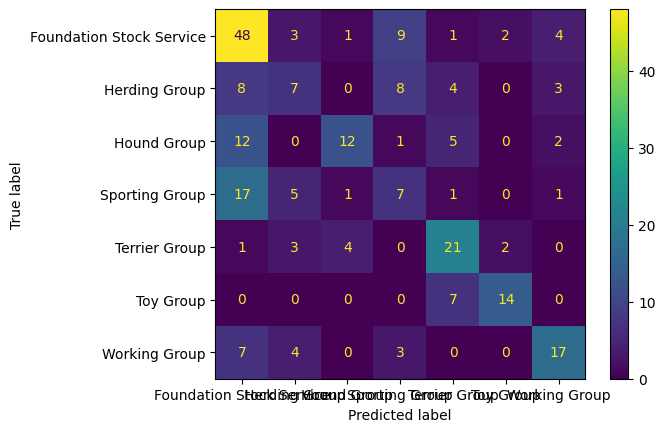

In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Definindo o dicionário invertido de encoding
class_encoding = {
    0: 'Foundation Stock Service',
    1: 'Herding Group',
    2: 'Hound Group',
    3: 'Sporting Group',
    4: 'Terrier Group',
    5: 'Toy Group',
    6: 'Working Group'
}

# Realizando previsões usando validação cruzada
predicted_labels = cross_val_predict(rf_classifier, features, labels, cv=10)

# Calculando o F1-score
f1 = f1_score(labels, predicted_labels, average='macro')
print("F1-score: {:.2f}%".format(f1 * 100))

# Calculando e exibindo a matriz de confusão com os nomes das classes
class_names = [class_encoding[i] for i in range(len(class_encoding))]
cm = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Desempenho ótimo para acertar as raças do group Foundation Stock Service, acredito que por ela apresentar mais linhas e características mais fáceis de se generalizar. A dificuldade existiu ao tentar acertar os grupos Herding e Hound. Ambos com características que acabavam se similiarizando muito com outras classes de grupos.

## <font color ="#2e8b57"> Naive Bays  </font>

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definindo target e features
labels = np.array(df['group_encoded'])
features = df.drop(['group_encoded', 'min_weight', 'max_weight', 'min_height', 'max_weight', "temperament","amiable"], axis=1)
feature_list = list(features.columns)
features = np.array(features)


# Criando o classificador Naive Bayes
nb_classifier = GaussianNB()

# Realizando a validação cruzada com 10 folds
scoresNb = cross_val_score(nb_classifier, features, labels, cv=10)

# Exibindo a acurácia média obtida em cada fold
print("Acurácia Média: {:.2f}%".format(scoresNb.mean() * 100))


Acurácia Média: 47.03%


### <font color ="#2e8b57"> F1-Score e Matriz de Confusão  </font>

F1-score: 46.11%


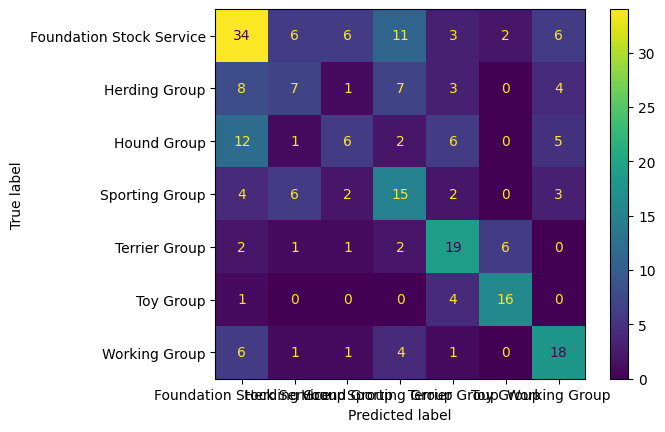

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Realizando previsões usando validação cruzada
predicted_labels = cross_val_predict(nb_classifier, features, labels, cv=10)

# Calculando o F1-score
f1 = f1_score(labels, predicted_labels, average='macro')
print("F1-score: {:.2f}%".format(f1 * 100))

# Calculando e exibindo a matriz de confusão com os nomes das classes
class_names = [class_encoding[i] for i in range(len(class_encoding))]
cm = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()


Resultado similar ao Random Forest com uma acurácia um pouco abaixo.
Conseguiu prever melhor o Sporting Group. Apresentou também dificuldade ao tentar acertar os grupos Herding e Hound.

## <font color ="#2e8b57"> MLP  </font>

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Definindo target e features
labels = np.array(df['group_encoded'])
features = df.drop(['group_encoded', 'min_weight', 'max_weight', 'min_height', 'max_weight', "temperament","amiable"], axis=1)
#features = df.drop(['group_encoded', 'dog_BMI'], axis=1)
feature_list = list(features.columns)
features = np.array(features)


# Criando o classificador MLP
mlp_classifier = MLPClassifier(random_state=42)  # Você pode ajustar os hiperparâmetros conforme necessário

# Realizando a validação cruzada com 10 folds
scoresMlp = cross_val_score(mlp_classifier, features, labels, cv=10)

# Exibindo a acurácia média obtida em cada fold
print("Acurácia Média: {:.2f}%".format(scoresMlp.mean() * 100))


Acurácia Média: 46.13%


### <font color ="#2e8b57"> F1-Score e Matriz de Confusão  </font>

F1-score: 41.73%


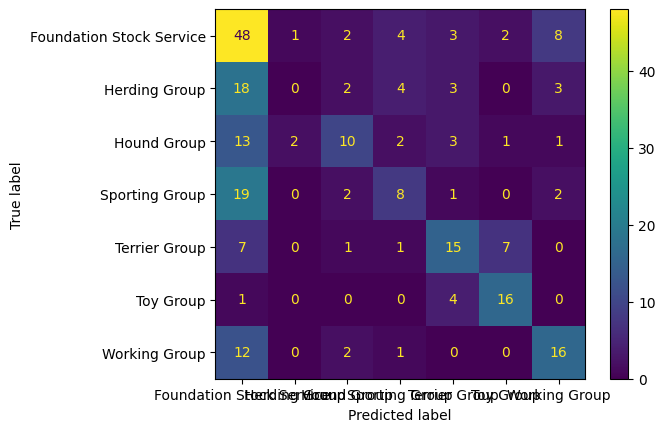

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Criando o classificador MLP
mlp_classifier = MLPClassifier(random_state=42)  # Você pode ajustar os hiperparâmetros conforme necessário

# Realizando previsões usando validação cruzada
predicted_labels_mlp = cross_val_predict(mlp_classifier, features, labels, cv=10)

# Calculando o F1-score
f1_mlp = f1_score(labels, predicted_labels_mlp, average='macro')
print("F1-score: {:.2f}%".format(f1_mlp * 100))

# Calculando e exibindo a matriz de confusão com os nomes das classes
class_names = [class_encoding[i] for i in range(len(class_encoding))]
cm_mlp = confusion_matrix(labels, predicted_labels_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=class_names)
disp_mlp.plot()
plt.show()

Uma acurácia menor entre os três supervisionados testados. Porém conseguiu acertar muito bem o grupo Foundation Stock Service, ao mesmo tempo que errou bastante nos outros grupos, tentando caracteriza-los como pertences a classe que teve mais acertos.

# <font color ="#2e8b57"> Parte 2 (A) - K-means e Hierárquico.  </font>

---



## <font color ="#2e8b57"> K-means 7 clusters  </font>


Inicialmente testei 7 clusters para tentar dividir entre os  sete grupos de raças, o nosso target de maior interesse nos outros modelos supervisionados

In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd

# Remove the label from features
features = df.drop(['group_encoded', 'min_weight', 'max_weight', 'min_height',"max_height" ,"temperament","amiable"], axis=1)

# Convert features to numpy array
features_array = features.values

# K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)  # Assuming 3 clusters
kmeans.fit(features_array)
kmeans_labels = kmeans.labels_

# Calculate silhouette score for K-means
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)

# Print silhouette scores
print("Silhouette Score for K-means:", kmeans_silhouette)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-means: 0.49548676705470435


# <font color ="#2e8b57"> Parte 2 (B) - Método do Cotovelo pra achar k ótimo  </font>




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

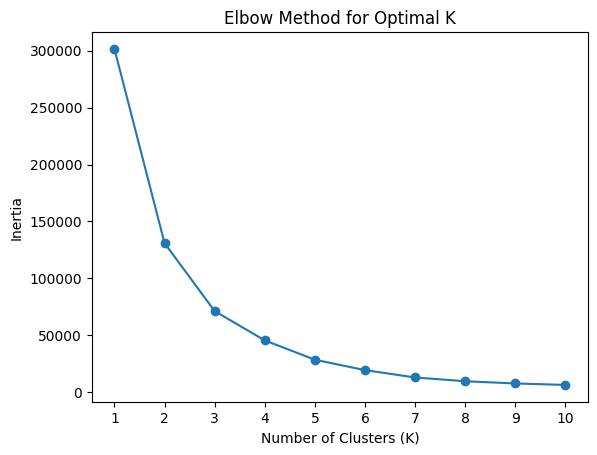

In [51]:
inertia_values = []
k_values = range(1, 11)  # Teste de K de 1 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_array)
    inertia_values.append(kmeans.inertia_)

# Plotando a inércia em relação ao número de clusters
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


Usei 3 clusters pelo método do cotovelo e o resultado da silhueta aumentou consideravelmente bem.

In [52]:
# Escolhendo o valor de K ótimo
k_optimo = 3  # A partir da análise visual do gráfico do cotovelo

# K-means clustering
kmeans = KMeans(n_clusters=k_optimo, random_state=42)  # Assuming 3 clusters
kmeans.fit(features_array)
kmeans_labels = kmeans.labels_

# Calculate silhouette score for K-means
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)

# Print silhouette scores
print("Silhouette Score for K-means:", kmeans_silhouette)


Silhouette Score for K-means: 0.6031316461076472


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## <font color ="#2e8b57"> Hierárquico 7 clusters  </font>


Da mesma forma, 7 clusters para tentar dividir entre os  sete grupos de raças, o nosso target dos supervisionados.

In [53]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

# Remove the label from features
features = df.drop(['group_encoded', 'min_weight', 'max_weight', 'min_height', "max_height" ,"temperament","amiable"], axis=1)

# Convert features to numpy array
features_array = features.values

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=7)
hierarchical.fit(features_array)
hierarchical_labels = hierarchical.labels_

# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette = silhouette_score(features_array, hierarchical_labels)

# Print silhouette scores
print("Silhouette Score for Hierarchical Clustering:", hierarchical_silhouette)

Silhouette Score for Hierarchical Clustering: 0.48056734361201814


# <font color ="#2e8b57"> Parte 2 (C) - Hierárquico - Ward e Complete Linkage (3 clusters)  </font>


Com um linkage complete o resultado da silhueta se adaptou melhor. Essa ligação tendeu a formar clusters mais compactos e bem definidos, apesar de ser sensível a outliers.

In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Hierarchical clustering with 'ward' linkage
hierarchical_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_ward.fit(features_array)
hierarchical_labels_ward = hierarchical_ward.labels_
hierarchical_silhouette_ward = silhouette_score(features_array, hierarchical_labels_ward)

# Hierarchical clustering with 'complete' linkage
hierarchical_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
hierarchical_complete.fit(features_array)
hierarchical_labels_complete = hierarchical_complete.labels_
hierarchical_silhouette_complete = silhouette_score(features_array, hierarchical_labels_complete)

# Print silhouette scores
print("Silhouette Score for Hierarchical Clustering with 'ward' linkage:", hierarchical_silhouette_ward)
print("Silhouette Score for Hierarchical Clustering with 'complete' linkage:", hierarchical_silhouette_complete)


Silhouette Score for Hierarchical Clustering with 'ward' linkage: 0.5100536487728682
Silhouette Score for Hierarchical Clustering with 'complete' linkage: 0.5773536710493747


# <font color ="#2e8b57"> Parte 2 (D) - Comparação e Conclusões  </font>


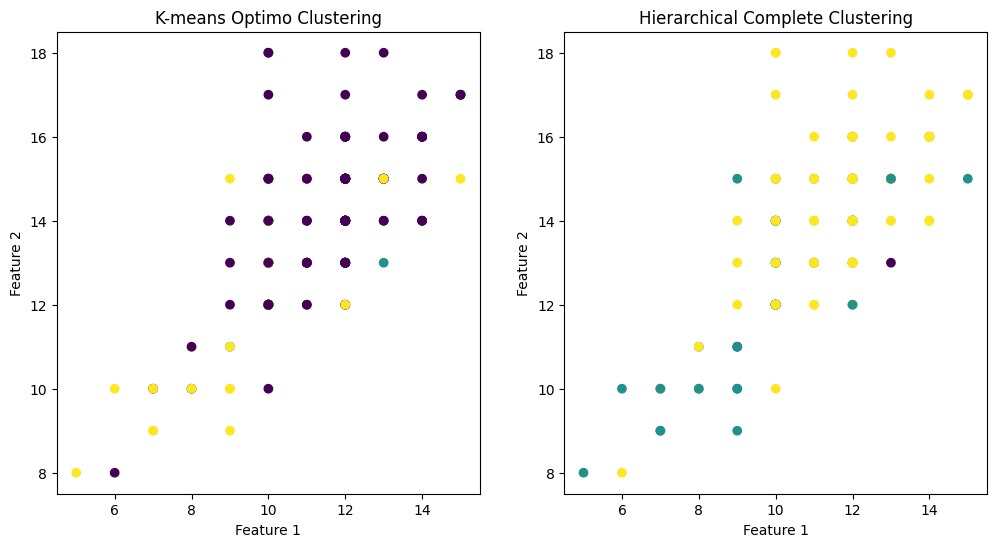

In [55]:
# Plot the clusters for K-means
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(features_array[:, 0], features_array[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Optimo Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the clusters for hierarchical clustering
plt.subplot(1, 2, 2)
plt.scatter(features_array[:, 0], features_array[:, 1], c=hierarchical_labels_complete, cmap='viridis')
plt.title('Hierarchical Complete Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

O K-means proporcionou um agrupamento mais conciso, destacando representantes mais robustos dos três grupos identificados. Perceptível que esses três clusters se alinham de forma notável com a categorização que empreguei na coluna "temperament", onde optei por três classes distintas: "emotional", "lively" e "quick-witted". Ao explorar essa similaridade, surge uma possível conclusão que este agrupamento pode, também, explicar a coluna "group" (o target dos supervisionados).

Os valores que apliquei na categorização da coluna "temperament" refletem, essencialmente, os adjetivos que descrevem as raças dentro de seus respectivos grupos. É notável que todos os adjetivos presentes na descrição dos grupos no American Kennel Club também se manifestam nos temperamentos das raças associadas a esses grupos.